# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss, hinge_loss

np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

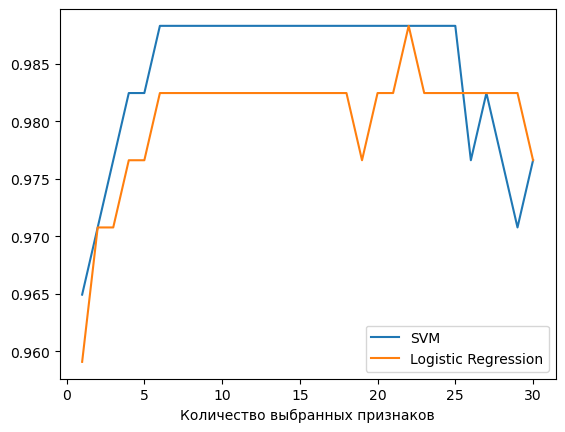

In [2]:
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

available_features = np.arange(X_train.shape[1])

iterations = []
svm_scores = []
lr_scores = []

selected_svm = []
selected_lr = []

def evaluate_model (estimator, feature_indices):
    selected = np.array(sorted(feature_indices))
    train_subset = X_train[:, selected]
    test_subset = X_test[:, selected]
    estimator.fit(train_subset, y_train)
    predictions = estimator.predict(test_subset)
    return accuracy_score(y_test, predictions)


for step in range(len(available_features)):
    top_feature_svm = -1
    best_score_svm = 0.0

    top_feature_lr = -1
    best_score_lr = 0.0

    for current_feature in available_features:
        if current_feature in selected_svm:
            continue
        candidate_features = selected_svm.copy()
        candidate_features.append(current_feature)
        svm_estimator = LinearSVC(random_state=123)
        current_score = evaluate_model(svm_estimator, candidate_features)

        if top_feature_svm == -1 or best_score_svm < current_score:
            top_feature_svm = current_feature
            best_score_svm = current_score

    final_svm = LinearSVC(random_state=123)
    selected_svm.append(top_feature_svm)
    svm_scores.append(evaluate_model(final_svm, selected_svm))

    for current_feature in available_features:
        if current_feature in selected_lr:
            continue
        candidate_features = selected_lr.copy()
        candidate_features.append(current_feature)
        lr_estimator = LogisticRegression(max_iter=500)
        current_score = evaluate_model(lr_estimator, candidate_features)

        if top_feature_lr == -1 or best_score_lr < current_score:
            top_feature_lr = current_feature
            best_score_lr = current_score

    final_lr = LogisticRegression(max_iter=500)
    selected_lr.append(top_feature_lr)
    lr_scores.append(evaluate_model(final_lr, selected_lr))

    iterations.append(step + 1)

    clear_output(True)
    plt.plot(iterations, svm_scores, label="SVM")
    plt.plot(iterations, lr_scores, label="Logistic Regression")
    plt.xlabel("Количество выбранных признаков")

    plt.legend()

    plt.show()

# Backward elimination (2pts)

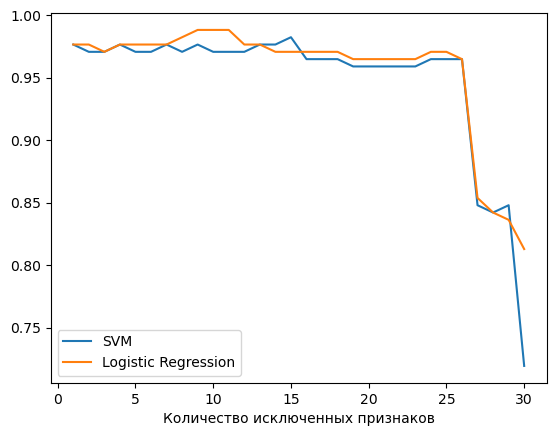

In [3]:
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

available_features = np.arange(X_train.shape[1])

iteration_numbers = []
svm_performance = []
lr_performance = []

selected_svm = list(available_features)
selected_lr = list(available_features)

def calculate_performance (classifier, feature_indices):
    selected = np.array(sorted(feature_indices))
    train_data = X_train[:, selected]
    test_data = X_test[:, selected]
    classifier.fit(train_data, y_train)
    predictions = classifier.predict(test_data)
    return accuracy_score(y_test, predictions)


for step in range(len(available_features)):
    svm_classifier = LinearSVC(random_state=123)
    svm_performance.append(calculate_performance(svm_classifier, selected_svm))

    lr_classifier = LogisticRegression(max_iter=500)
    lr_performance.append(calculate_performance(lr_classifier, selected_lr))

    iteration_numbers.append(step + 1)

    least_useful_svm = -1
    current_svm_score = 0.0

    least_useful_lr = -1
    current_lr_score = 0.0

    for current_feature in available_features:
        if current_feature not in selected_svm:
            continue
        candidate_set = selected_svm.copy()
        candidate_set.append(current_feature)
        temp_svm = LinearSVC(random_state=123)
        performance = calculate_performance(temp_svm, candidate_set)

        if least_useful_svm == -1 or current_svm_score > performance:
            least_useful_svm = current_feature
            current_svm_score = performance

    for current_feature in available_features:
        if current_feature not in selected_lr:
            continue
        candidate_set = selected_lr.copy()
        candidate_set.append(current_feature)
        temp_lr = LogisticRegression(max_iter=500)
        performance = calculate_performance(temp_lr, candidate_set)

        if least_useful_lr == -1 or current_lr_score > performance:
            least_useful_lr = current_feature
            current_lr_score = performance

    selected_lr.remove(least_useful_lr)
    selected_svm.remove(least_useful_svm)

    clear_output(True)
    plt.plot(iteration_numbers, svm_performance, label="SVM")
    plt.plot(iteration_numbers, lr_performance, label="Logistic Regression")
    plt.xlabel("Количество исключенных признаков")

    plt.legend()

    plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

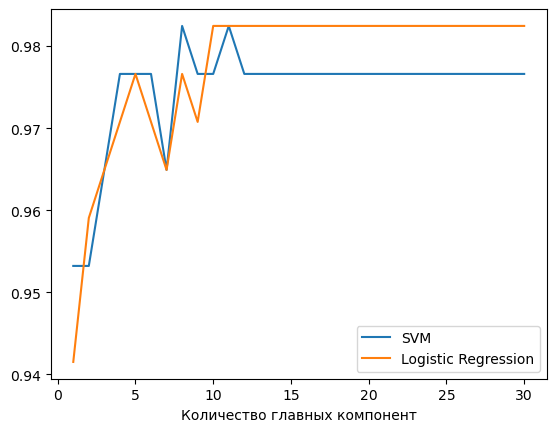

In [4]:
plt.cla()

component_counts = []
svm_results = []
lr_results = []

def evaluate_classifier (estimator, X_train_set, X_test_set, y_train_set, y_test_set):
    estimator.fit(X_train_set, y_train_set)
    predicted = estimator.predict(X_test_set)
    return accuracy_score(y_test_set, predicted)

for n_components in range(1, len(available_features) + 1):
    pca = decomposition.PCA(n_components=n_components)
    
    transformed_X = X.copy()
    transformed_X = pca.fit_transform(transformed_X)
    X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3, random_state=5)

    svm_estimator = LinearSVC(random_state=69)
    lr_estimator = LogisticRegression(max_iter=500)

    component_counts.append(n_components)
    svm_results.append(evaluate_classifier(svm_estimator, X_train, X_test, y_train, y_test))
    lr_results.append(evaluate_classifier(lr_estimator, X_train, X_test, y_train, y_test))

    clear_output(True)
    plt.plot(component_counts, svm_results, label="SVM")
    plt.plot(component_counts, lr_results, label="Logistic Regression")
    plt.xlabel("Количество главных компонент")

    plt.legend()

    plt.show()

#  Выводы (1pts)

**Forward Selection**

При применении Forward Selection наивысшую точность показала SVM с использованием 7-14 признаков. 
С увеличением числа признаков точность логистической регрессии постепенно растёт. В то же время точность SVM сначала повышается, 
затем снижается. При этом максимальные показатели обеих моделей остаются достаточно высокими: 0.98-0.99.

**Backward Elimination**

При использовании backward elimination точность логистической регрессии постепенно уменьшается. 
Интересно, что её наилучший результат достигается при удалении относительно небольшого числа признаков. 
График точности SVM демонстрирует похожее поведение.

**PCA**

При использовании PCA точность логистической регрессии возрастает с увеличением числа компонент, 
достигая максимума при 10-30 компонентах. Гравик точности SVM ведет себя так же. В данном случае логистическая регрессия демонстрирует более высокие результаты по сравнению с SVM.

**Итоговые наблюдения**

Для SVM наиболее эффективным методом сокращения размерности оказался forward selection, 
тогда как для логистической регрессии хорошо подходят как forward selection, так и PCA.

Результаты показывают, что оптимальный метод снижения размерности следует подбирать индивидуально 
для каждой модели экспериментальным путём. Выбор наилучшего подхода зависит от конкретной задачи 
и используемого алгоритма машинного обучения.